# NYC Airbnb Data Exploration

This notebook explores the NYC Airbnb listings data, focusing on price analysis and geographical distribution.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from pathlib import Path

# Set plot style
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (12, 6)

ModuleNotFoundError: No module named 'matplotlib'

## Download and Load Data

In [ ]:
# Create data directory if it doesn't exist
Path('data').mkdir(exist_ok=True)

# Download the data
url = "https://data.insideairbnb.com/united-states/ny/new-york-city/2025-05-01/visualisations/listings.csv"
response = requests.get(url)
with open('data/listings.csv', 'wb') as f:
    f.write(response.content)

# Load the data
df = pd.read_csv('data/listings.csv')

# Display basic information
print("Dataset Info:")
df.info()
print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37018 entries, 0 to 37017
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              37018 non-null  int64  
 1   name                            37016 non-null  object 
 2   host_id                         37018 non-null  int64  
 3   host_name                       36993 non-null  object 
 4   neighbourhood_group             37018 non-null  object 
 5   neighbourhood                   37018 non-null  object 
 6   latitude                        37018 non-null  float64
 7   longitude                       37018 non-null  float64
 8   room_type                       37018 non-null  object 
 9   price                           21833 non-null  float64
 10  minimum_nights                  37018 non-null  int64  
 11  number_of_reviews               37018 non-null  int64  
 12  last_review       

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,3.701800e+04,3.701800e+04,37018.000000,37018.000000,21833.000000,37018.000000,37018.000000,25358.000000,37018.000000,37018.000000,37018.000000
mean,4.372920e+17,1.714205e+08,40.728570,-73.947247,233.896808,29.226025,26.240721,0.819498,72.739802,152.444892,3.966719
std,5.144149e+17,1.888658e+08,0.056333,0.055007,455.382022,35.784675,65.675512,1.851575,235.286250,144.302059,20.022130
min,2.539000e+03,1.678000e+03,40.500366,-74.251907,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.140000e+07,1.768211e+07,40.688420,-73.983460,90.000000,30.000000,0.000000,0.080000,1.000000,0.000000,0.000000
50%,5.037505e+07,8.655362e+07,40.726132,-73.955001,150.000000,30.000000,3.000000,0.260000,2.000000,122.000000,0.000000
75%,9.261013e+17,3.036643e+08,40.762271,-73.928302,268.000000,30.000000,22.000000,0.940000,8.000000,296.000000,1.000000
max,1.410916e+18,6.919326e+08,40.912017,-73.711822,20000.000000,1250.000000,3047.000000,120.430000,1225.000000,365.000000,1792.000000


## Data Cleaning

In [ ]:
# Select required columns
columns_to_keep = [
    'id', 'neighbourhood_group', 'neighbourhood', 'room_type',
    'minimum_nights', 'price', 'availability_365', 'latitude', 'longitude'
]
df = df[columns_to_keep]

# Filter price range
df = df[(df['price'] > 0) & (df['price'] <= 2000)]

print(f"Shape after cleaning: {df.shape}")

Shape after cleaning: (21747, 9)


## Price Distribution Analysis

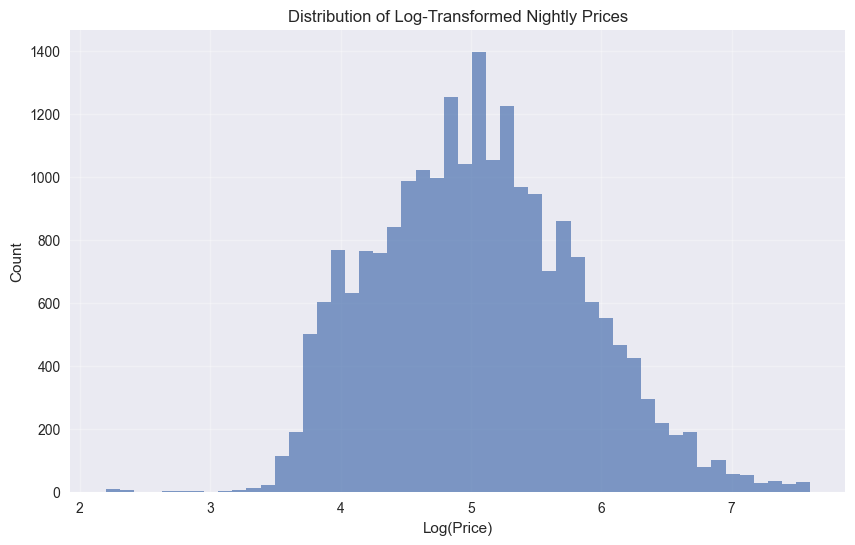

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.log1p(df['price']), bins=50, alpha=0.7)
plt.title('Distribution of Log-Transformed Nightly Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)
plt.show()

**Insight:** The log-transformed price distribution shows a roughly normal distribution, suggesting that most listings fall within a moderate price range, with fewer extremely expensive or cheap options.

<Figure size 1200x600 with 0 Axes>

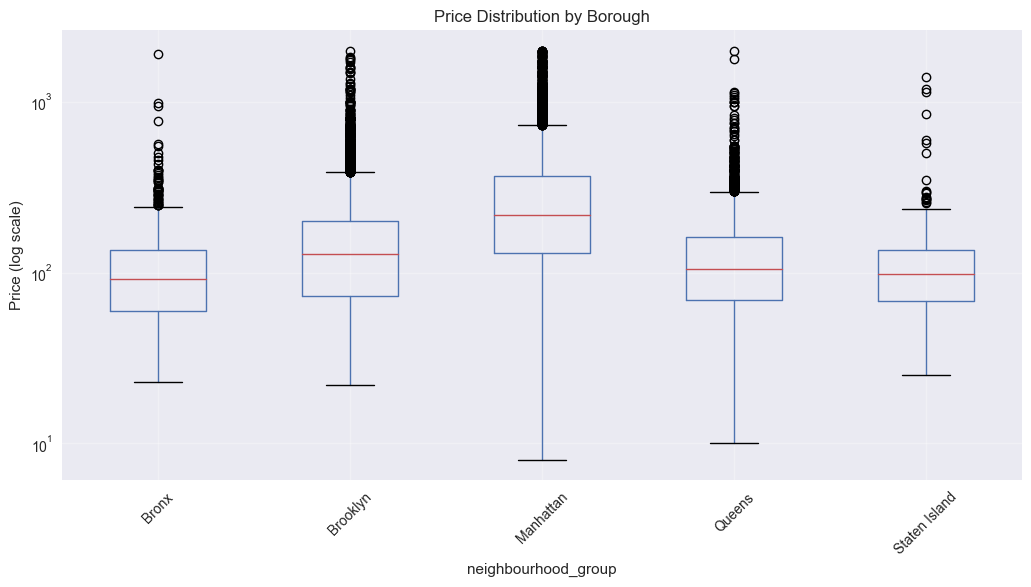

In [ ]:
plt.figure(figsize=(12, 6))
df.boxplot(column='price', by='neighbourhood_group', figsize=(12, 6))
plt.yscale('log')
plt.title('Price Distribution by Borough')
plt.suptitle('')  # Remove automatic suptitle
plt.ylabel('Price (log scale)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

**Insight:** Manhattan shows the highest median prices and greatest price variation, while the Bronx has the lowest prices, highlighting the significant price differences between boroughs.

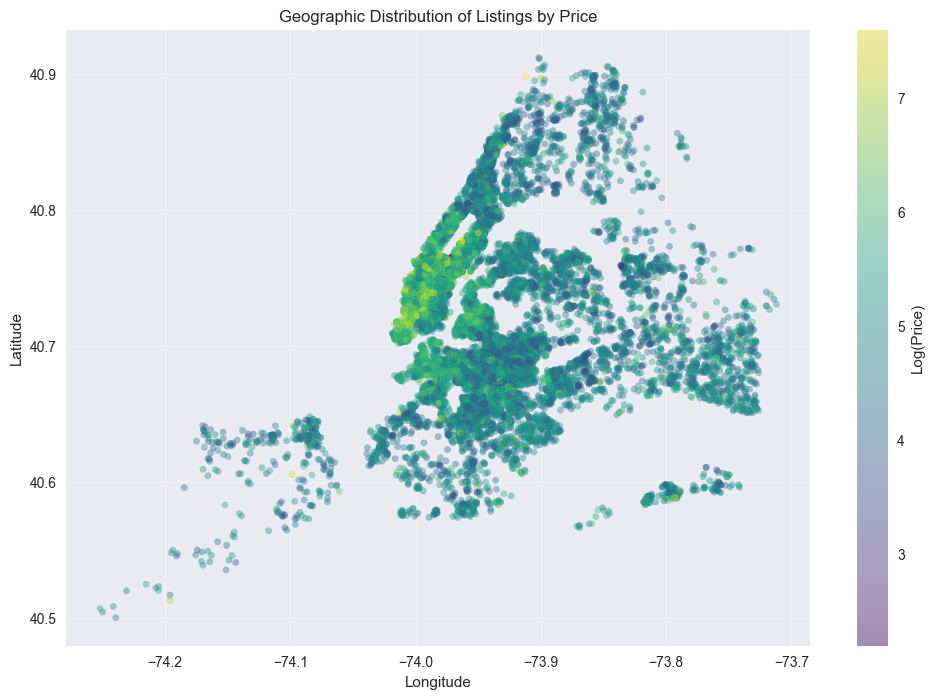

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['longitude'], df['latitude'], 
                     c=np.log1p(df['price']), 
                     cmap='viridis', 
                     alpha=0.4,
                     s=20)
plt.colorbar(scatter, label='Log(Price)')
plt.title('Geographic Distribution of Listings by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.show()

**Insight:** The geographic distribution reveals clear price clusters, with higher-priced listings concentrated in Manhattan and lower-priced listings in the outer boroughs, showing the strong relationship between location and price.

In [ ]:
# Save cleaned and trimmed data
import os

# Ensure the directory exists
os.makedirs("../notebooks/data/clean", exist_ok=True)

# Save the DataFrame (replace `df` with your cleaned DataFrame variable if different)
df.to_csv("../notebooks/data/clean/listings.csv", index=False)
print("Cleaned data saved to ../notebooks/data/clean/listings.csv")

Cleaned data saved to ../notebooks/data/clean/listings.csv
